# 18MAT333 Graph Analysis & Alogorithms
### Nandana NS CB.SC.I5DAS18023
### Uthara Koliyot CB.SC.I5DAS18044

# Case Study : FLIGHT ROUTES AND AIRPORTS NETWORK IN INDIA

### AIM : To analyse the airport routes and flight networks in India

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')

In [3]:
routes = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'routes.dat?raw=true',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


# We load the dataset with details about the airports, and we only keep the airports from India:

In [4]:
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')

In [5]:
airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_in = airports[airports['country'] ==
                       'India']
airports_in

,id,name,city,country,icao,lat,lon,alt,timezone,dst,tz,type,source
iata,,,,,,,,,,,,,
AMD,2994,Sardar Vallabhbhai Patel International Airport,Ahmedabad,India,VAAH,23.077200,72.634697,189,5.5,N,Asia/Calcutta,airport,OurAirports
AKD,2995,Akola Airport,Akola,India,VAAK,20.698999,77.058601,999,5.5,N,Asia/Calcutta,airport,OurAirports
IXU,2996,Aurangabad Airport,Aurangabad,India,VAAU,19.862700,75.398102,1911,5.5,N,Asia/Calcutta,airport,OurAirports
BOM,2997,Chhatrapati Shivaji International Airport,Mumbai,India,VABB,19.088699,72.867897,39,5.5,N,Asia/Calcutta,airport,OurAirports
PAB,2998,Bilaspur Airport,Bilaspur,India,VABI,21.988400,82.111000,899,5.5,N,Asia/Calcutta,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IXT,10061,Pasighat Airport,Pasighat,India,VEPG,28.066099,95.335602,477,5.3,N,NaN,airport,OurAirports
NaN,10750,HAL Airport,Bangalore,India,VOBG,12.950000,77.668198,2912,5.5,N,NaN,airport,OurAirports
RTC,11996,Ratnagiri Airport,NaN,India,VARG,17.013599,73.327797,305,NaN,NaN,NaN,airport,OurAirports


In [6]:
routes_in = routes[
    routes['source'].isin(airports_in.index) &
    routes['dest'].isin(airports_in.index)]
routes_in

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
2115,6E,2850,AMD,2994,BLR,3131,NaN,0,320
2116,6E,2850,AMD,2994,BOM,2997,NaN,0,320
2117,6E,2850,AMD,2994,CCU,3043,NaN,0,320
2118,6E,2850,AMD,2994,DEL,3093,NaN,0,320
2119,6E,2850,AMD,2994,GOI,3007,NaN,0,320
...,...,...,...,...,...,...,...,...,...
49548,SG,4375,UDR,3023,DEL,3093,NaN,0,DH8
49549,SG,4375,VGA,3134,BLR,3131,NaN,0,DH8
49551,SG,4375,VNS,3084,DEL,3093,NaN,0,737
49552,SG,4375,VTZ,3066,BLR,3131,NaN,0,737


In [7]:
edges = routes_in[['source', 'dest']].values
edges

array([['AMD', 'BLR'],
       ['AMD', 'BOM'],
       ['AMD', 'CCU'],
       ...,
       ['VNS', 'DEL'],
       ['VTZ', 'BLR'],
       ['VTZ', 'MAA']], dtype=object)

In [8]:
sg = nx.from_edgelist(edges)

In [9]:
len(sg.nodes()), len(sg.edges())

(68, 179)

In [10]:
print(nx.info(sg))

Name: 
Type: Graph
Number of nodes: 68
Number of edges: 179
Average degree:   5.2647


# There are 68 Indian airports and 179 routes in the dataset.

E:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


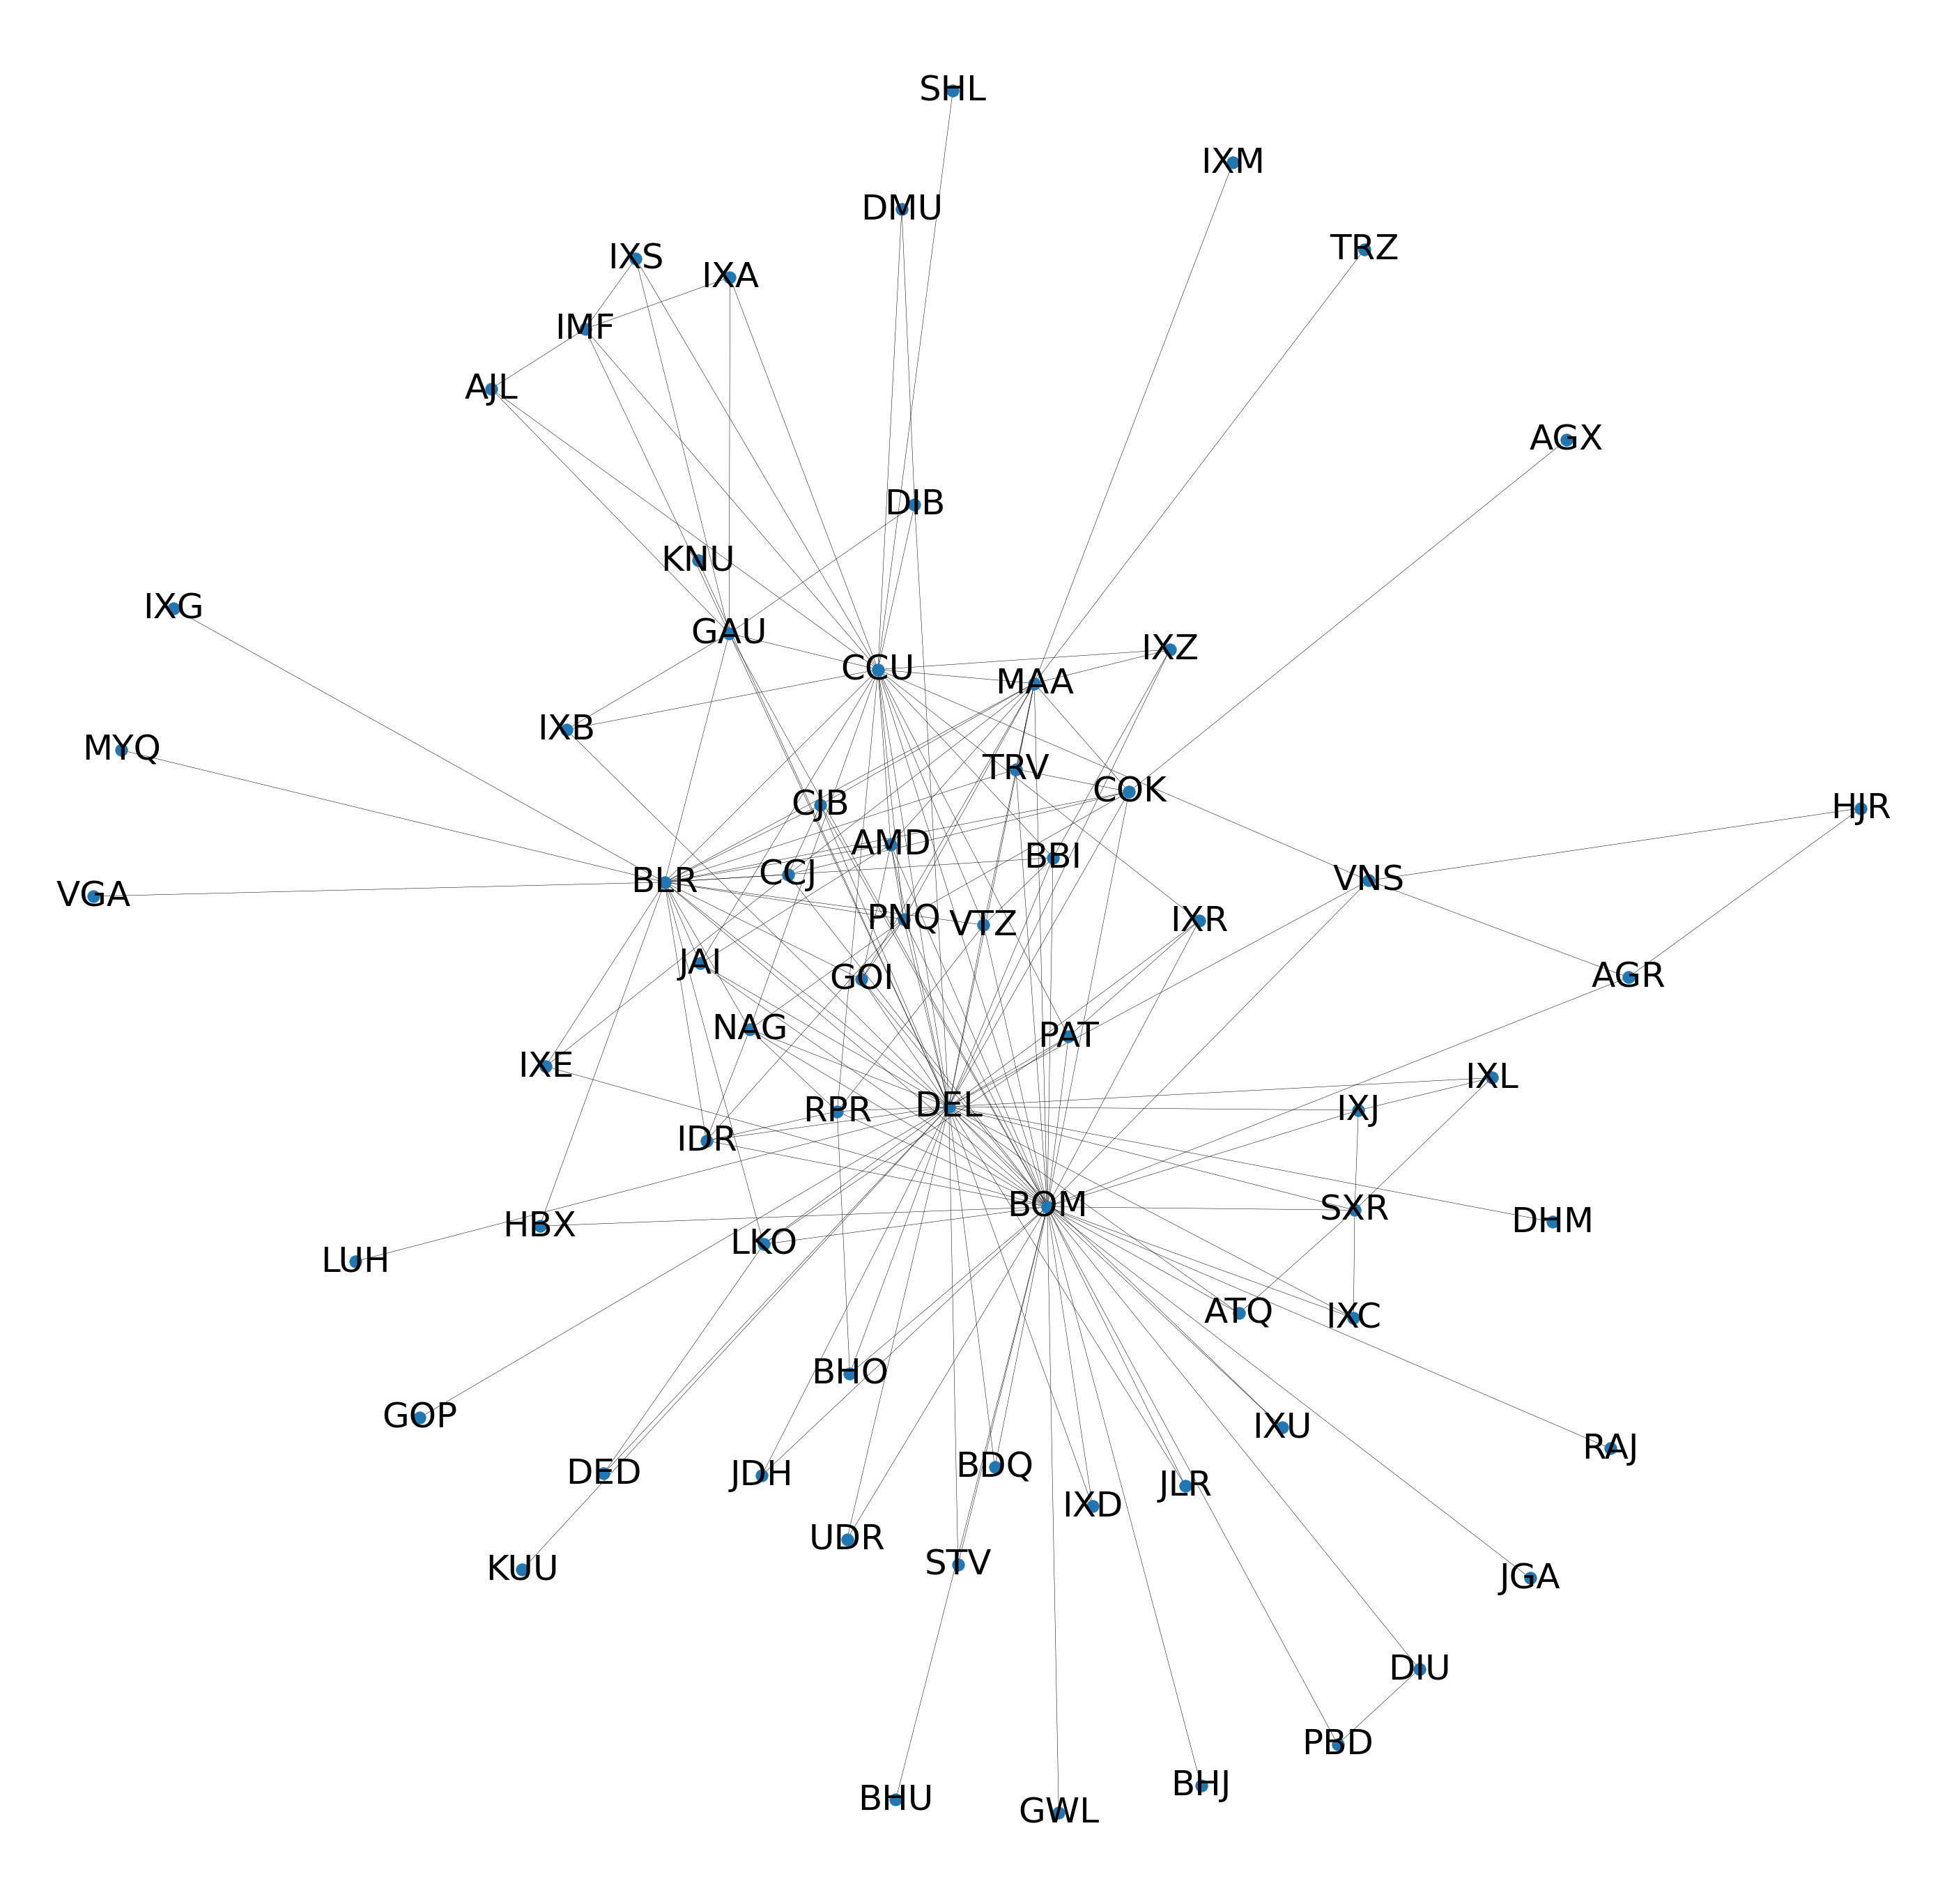

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(50, 50))
nx.draw_networkx(sg, ax=ax, node_size=300, alpha=1,
                 width=.5,font_size=50, with_labels=True)
ax.set_axis_off()

### The nodes represents the airports and edges represent the flight routes

In [13]:
nx.is_connected(sg)

True

# Degree Centrality

In [11]:
deg_centrality = sg.degree
print(deg_centrality)

[('AMD', 8), ('BLR', 23), ('BOM', 44), ('CCU', 24), ('DEL', 42), ('GOI', 6), ('JAI', 5), ('MAA', 15), ('PNQ', 10), ('BBI', 6), ('VTZ', 7), ('BDQ', 2), ('COK', 8), ('GAU', 10), ('LKO', 5), ('NAG', 7), ('TRV', 4), ('CJB', 5), ('IDR', 6), ('IXC', 3), ('IXJ', 4), ('PAT', 5), ('SXR', 6), ('DIB', 4), ('IMF', 5), ('IXA', 3), ('IXB', 3), ('IXR', 4), ('RPR', 7), ('VNS', 5), ('AJL', 3), ('ATQ', 3), ('BHJ', 1), ('BHO', 3), ('BHU', 1), ('IXE', 3), ('CCJ', 6), ('DIU', 2), ('IXU', 2), ('JDH', 2), ('RAJ', 1), ('UDR', 2), ('IXS', 3), ('IXZ', 4), ('DED', 2), ('GOP', 1), ('IXL', 3), ('PBD', 2), ('IXM', 1), ('TRZ', 1), ('AGR', 3), ('HJR', 2), ('AGX', 1), ('GWL', 1), ('IXD', 2), ('JGA', 1), ('DMU', 2), ('SHL', 1), ('DHM', 1), ('JLR', 2), ('KNU', 1), ('KUU', 1), ('LUH', 1), ('STV', 2), ('HBX', 2), ('IXG', 1), ('MYQ', 1), ('VGA', 1)]


C:\Users\Lenovo\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


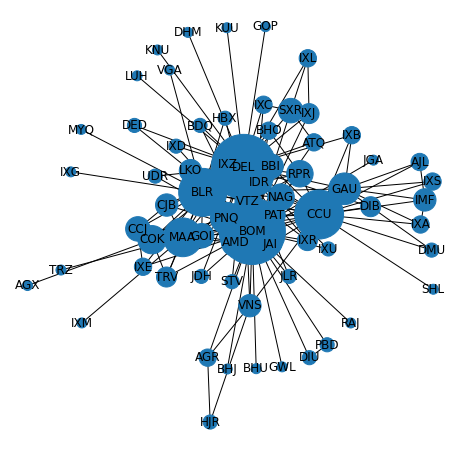

In [12]:
deg_centrality_1 = nx.degree_centrality(sg)
d = dict(sg.degree)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw(sg, nodelist=d.keys(), node_size=[v * 100 for v in d.values()],pos=pos,ax=ax,with_labels=True)
plt.show()

### Top 10 maximum degree centrality nodes

In [16]:
k = sorted(sg.degree, key=lambda x: x[1], reverse=True)
r = k [0:10]
s = []
for node,val in r:
    s.append(node)
print('The airports with maximum links are',s)

The airports with maximum links are ['BOM', 'DEL', 'CCU', 'BLR', 'MAA', 'PNQ', 'GAU', 'AMD', 'COK', 'VTZ']


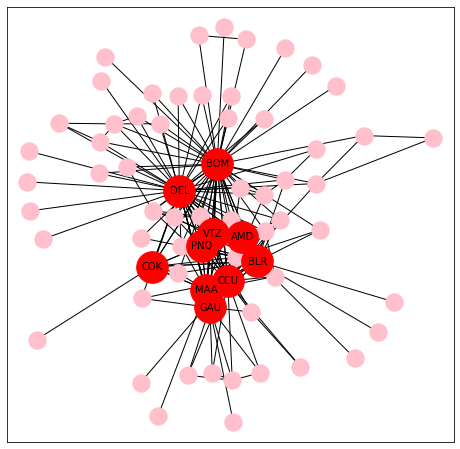

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw_networkx(sg, pos=pos, node_color='pink',with_labels=False,ax= ax)
nx.draw_networkx(sg.subgraph(s), pos=pos, font_size=10, node_size = 1000, node_color='red', font_color='black',ax=ax)

<function matplotlib.pyplot.show(*args, **kw)>

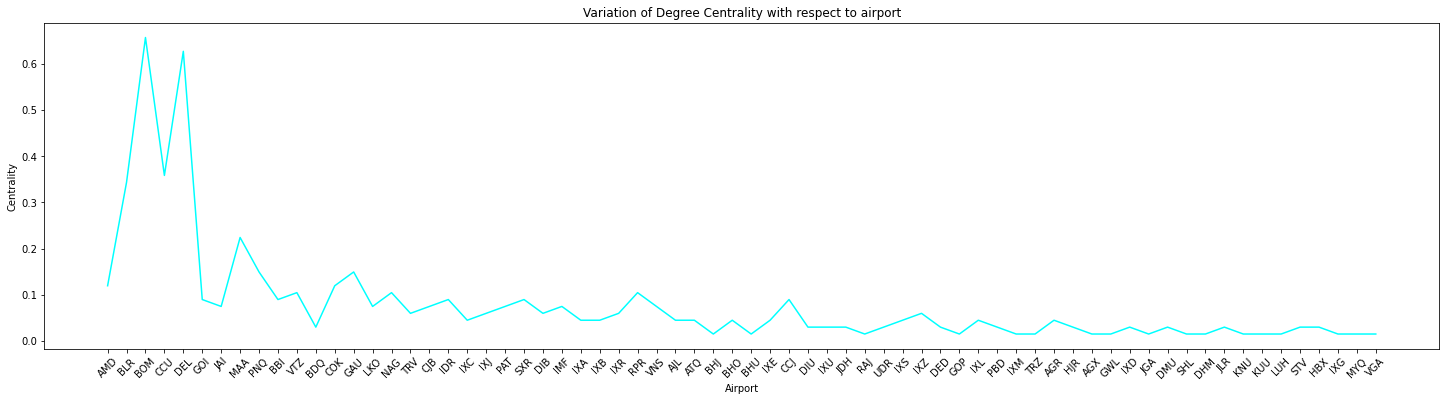

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
node_deg = list(deg_centrality_1.keys())           
centrality_deg = list(deg_centrality_1.values())        
plt.plot(node_deg,centrality_deg, '-',color='cyan')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of Degree Centrality with respect to airport")
plt.show

# Closeness Centrality

In [15]:
close_centrality = nx.closeness_centrality(sg)
print(close_centrality)

{'AMD': 0.5234375, 'BLR': 0.5982142857142857, 'BOM': 0.7444444444444445, 'CCU': 0.6036036036036037, 'DEL': 0.7282608695652174, 'GOI': 0.49264705882352944, 'JAI': 0.5037593984962406, 'MAA': 0.5583333333333333, 'PNQ': 0.536, 'BBI': 0.5075757575757576, 'VTZ': 0.5193798449612403, 'BDQ': 0.46206896551724136, 'COK': 0.5037593984962406, 'GAU': 0.5234375, 'LKO': 0.48201438848920863, 'NAG': 0.5114503816793893, 'TRV': 0.4589041095890411, 'CJB': 0.48905109489051096, 'IDR': 0.4855072463768116, 'IXC': 0.4652777777777778, 'IXJ': 0.46853146853146854, 'PAT': 0.49264705882352944, 'SXR': 0.475177304964539, 'DIB': 0.44966442953020136, 'IMF': 0.3872832369942196, 'IXA': 0.38285714285714284, 'IXB': 0.44666666666666666, 'IXR': 0.48905109489051096, 'RPR': 0.5, 'VNS': 0.4962962962962963, 'AJL': 0.38285714285714284, 'ATQ': 0.4652777777777778, 'BHJ': 0.42948717948717946, 'BHO': 0.4652777777777778, 'BHU': 0.42948717948717946, 'IXE': 0.44370860927152317, 'CCJ': 0.4652777777777778, 'DIU': 0.432258064516129, 'IXU': 

### Top 10 maximum closeness centrality nodes

In [22]:
df2 = pd.DataFrame.from_dict({
    'node': list(close_centrality.keys()),
    'centrality': list(close_centrality.values())
})
r = df2 [0:10]
r['node'].values

array(['AMD', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'JAI', 'MAA', 'PNQ',
       'BBI'], dtype=object)

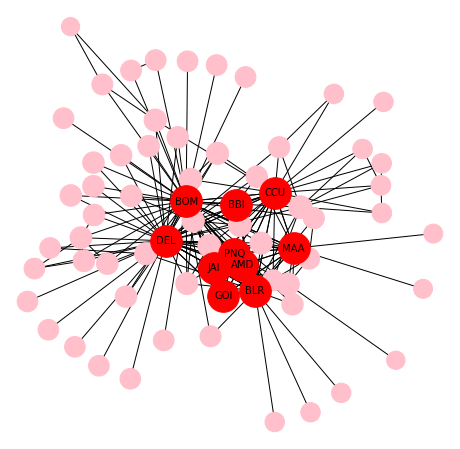

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw(sg, nodelist=close_centrality.keys(),node_color='pink', node_size=[v * 1000 for v in close_centrality.values()],pos=pos,ax=ax,with_labels=False)
nx.draw_networkx(sg.subgraph(r['node']), pos=pos, font_size=10,node_size=1000, node_color='red', font_color='black',ax=ax,with_labels=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

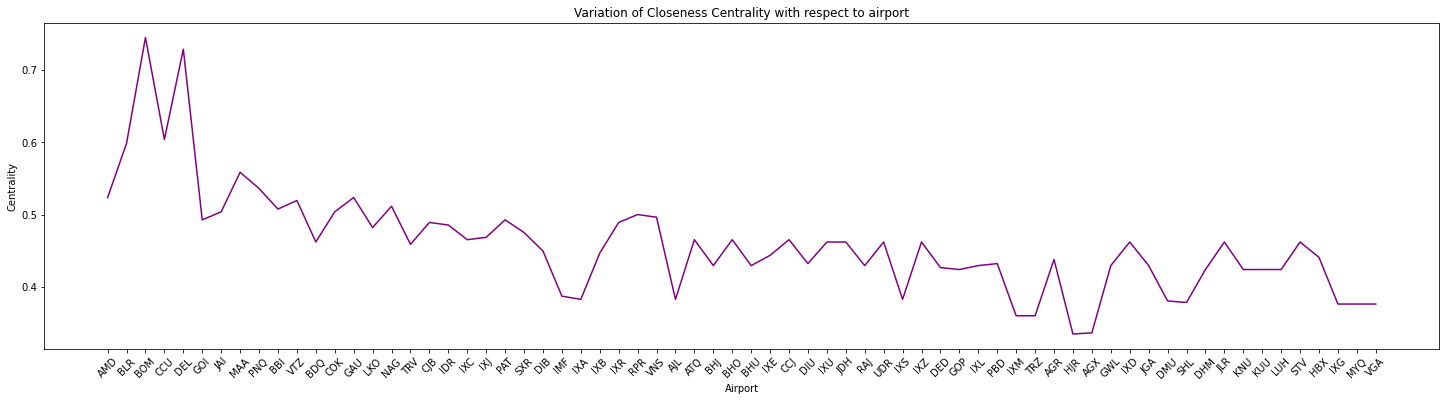

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
node_close = list(close_centrality.keys())           
centrality_close = list(close_centrality.values())        
plt.plot(node_close,centrality_close, '-',color='purple')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of Closeness Centrality with respect to airport")
plt.show

# Betweeness Centrality

In [18]:
bet_centrality = nx.betweenness_centrality(sg, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

{'AMD': 0.0008912867121822348, 'BLR': 0.1270490979446203, 'BOM': 0.4105342694894933, 'CCU': 0.15408922199966976, 'DEL': 0.36131069041516806, 'GOI': 0.0, 'JAI': 0.0, 'MAA': 0.07154630885974168, 'PNQ': 0.003652014099775293, 'BBI': 0.0017588823558972813, 'VTZ': 0.0009799487411427709, 'BDQ': 0.0, 'COK': 0.03188207591192664, 'GAU': 0.043934727516817054, 'LKO': 0.004275160991578902, 'NAG': 0.0008083679725470769, 'TRV': 0.0, 'CJB': 0.0007624216579440462, 'IDR': 0.0003919794964571085, 'IXC': 0.0, 'IXJ': 0.0016852964614158643, 'PAT': 0.0007258081884947557, 'SXR': 0.002589864530163038, 'DIB': 0.004267622924339341, 'IMF': 0.0004522840343735866, 'IXA': 0.0, 'IXB': 0.0, 'IXR': 0.0, 'RPR': 0.001848621251606326, 'VNS': 0.025463591135232933, 'AJL': 0.0, 'ATQ': 0.0, 'BHJ': 0.0, 'BHO': 0.0, 'BHU': 0.0, 'IXE': 0.0, 'CCJ': 0.0011357354640936731, 'DIU': 0.0, 'IXU': 0.0, 'JDH': 0.0, 'RAJ': 0.0, 'UDR': 0.0, 'IXS': 0.0, 'IXZ': 0.00022614201718679328, 'DED': 0.0, 'GOP': 0.0, 'IXL': 0.0, 'PBD': 0.0, 'IXM': 0.0,

In [26]:
df2 = pd.DataFrame.from_dict({
    'node': list(bet_centrality.keys()),
    'centrality': list(bet_centrality.values())
})

### Top 10 maximum betweenness centrality nodes

In [27]:
r = df2 [0:10]
r['node'].values

array(['AMD', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'JAI', 'MAA', 'PNQ',
       'BBI'], dtype=object)

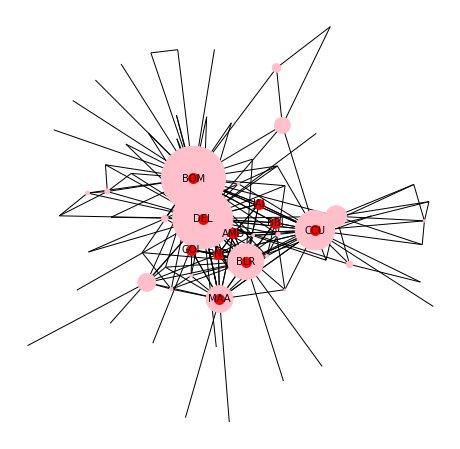

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw(sg, nodelist=bet_centrality.keys(),node_color='pink', node_size=[v * 10000 for v in bet_centrality.values()],pos=pos,ax=ax,with_labels=False)
nx.draw_networkx(sg.subgraph(r['node']), pos=pos, font_size=10,node_size=100, node_color='red', font_color='black',ax=ax,with_labels=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

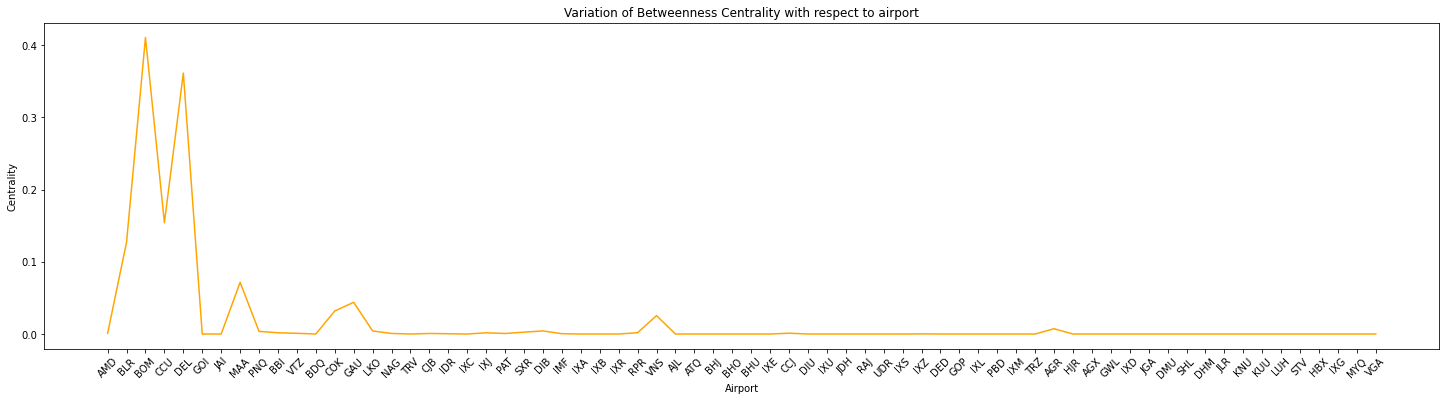

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
node_bet = list(bet_centrality.keys())           
centrality_bet = list(bet_centrality.values())        
plt.plot(node_bet,centrality_bet, '-',color='orange')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of Betweenness Centrality with respect to airport")
plt.show

# Clustering

In [20]:
clustering = nx.clustering(sg, nodes=None, weight=None)
print(clustering)

{'AMD': 0.8571428571428571, 'BLR': 0.2450592885375494, 'BOM': 0.09830866807610994, 'CCU': 0.21739130434782608, 'DEL': 0.10569105691056911, 'GOI': 1.0, 'JAI': 1.0, 'MAA': 0.38095238095238093, 'PNQ': 0.7111111111111111, 'BBI': 0.8, 'VTZ': 0.8095238095238095, 'BDQ': 1.0, 'COK': 0.5714285714285714, 'GAU': 0.37777777777777777, 'LKO': 0.6, 'NAG': 0.8571428571428571, 'TRV': 1.0, 'CJB': 0.9, 'IDR': 0.8666666666666667, 'IXC': 1.0, 'IXJ': 0.8333333333333334, 'PAT': 0.8, 'SXR': 0.6, 'DIB': 0.6666666666666666, 'IMF': 0.7, 'IXA': 1.0, 'IXB': 1.0, 'IXR': 1.0, 'RPR': 0.6666666666666666, 'VNS': 0.5, 'AJL': 1.0, 'ATQ': 1.0, 'BHJ': 0, 'BHO': 1.0, 'BHU': 0, 'IXE': 1.0, 'CCJ': 0.7333333333333333, 'DIU': 1.0, 'IXU': 1.0, 'JDH': 1.0, 'RAJ': 0, 'UDR': 1.0, 'IXS': 1.0, 'IXZ': 0.8333333333333334, 'DED': 1.0, 'GOP': 0, 'IXL': 1.0, 'PBD': 1.0, 'IXM': 0, 'TRZ': 0, 'AGR': 0.6666666666666666, 'HJR': 1.0, 'AGX': 0, 'GWL': 0, 'IXD': 1.0, 'JGA': 0, 'DMU': 1.0, 'SHL': 0, 'DHM': 0, 'JLR': 1.0, 'KNU': 0, 'KUU': 0, 'LUH':

In [35]:
df2 = pd.DataFrame.from_dict({
    'node': list(clustering.keys()),
    'centrality': list(clustering.values())
})
r = df2 [0:10]

### Top 10 maximum Clustering centrality nodes

In [36]:
r['node'].values

array(['AMD', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'JAI', 'MAA', 'PNQ',
       'BBI'], dtype=object)

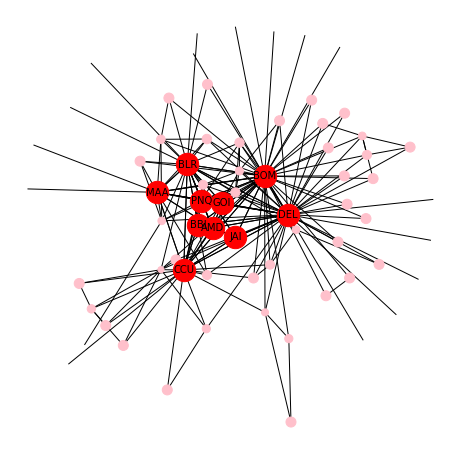

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw(sg, nodelist=clustering.keys(),node_color='pink', node_size=[v * 100 for v in clustering.values()],pos=pos,ax=ax,with_labels=False)
nx.draw_networkx(sg.subgraph(r['node']), pos=pos, font_size=10,node_size=500, node_color='red', font_color='black',ax=ax,with_labels=True)
plt.show()

# Average Clustering

In [27]:
nx.average_clustering(sg)

0.6087970051414424

<function matplotlib.pyplot.show(*args, **kw)>

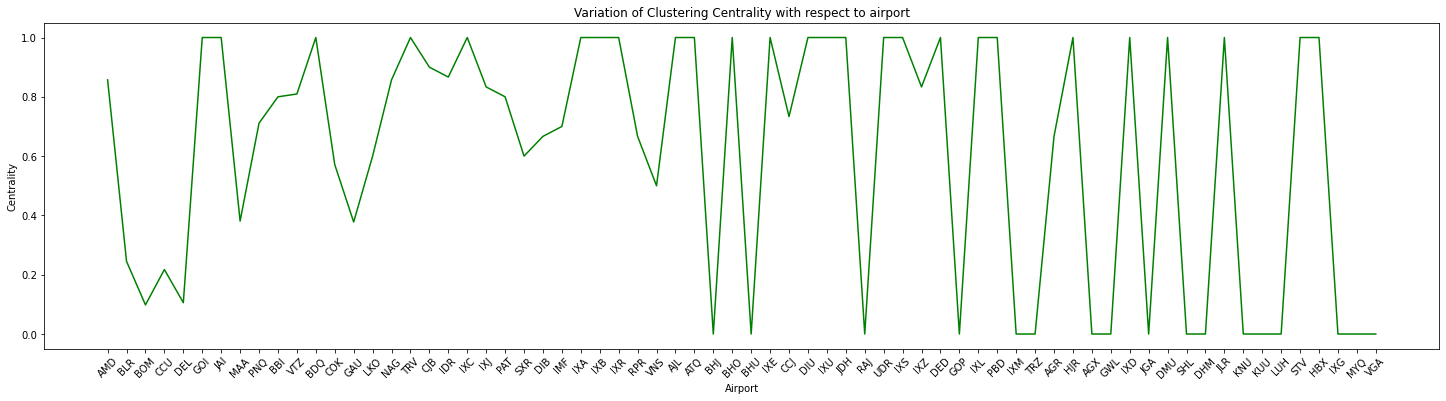

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
node_clust = list(clustering.keys())           
centrality_clust = list(clustering.values())        
plt.plot(node_clust,centrality_clust, '-',color='green')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of Clustering Centrality with respect to airport")
plt.show

# Eigenvector centrality 

In [23]:
eigen = nx.eigenvector_centrality(sg)
print(eigen)

{'AMD': 0.17533994885647974, 'BLR': 0.29181189399743873, 'BOM': 0.4120855708319133, 'CCU': 0.27945646900237636, 'DEL': 0.4021638630548327, 'GOI': 0.1434343776866687, 'JAI': 0.1314109925904101, 'MAA': 0.22319090651695275, 'PNQ': 0.1990739278450239, 'BBI': 0.13738147840588918, 'VTZ': 0.1585107710131737, 'BDQ': 0.0685526705974218, 'COK': 0.14626553503635611, 'GAU': 0.14229963016962074, 'LKO': 0.10594394089174286, 'NAG': 0.1562411086050035, 'TRV': 0.0903674312189032, 'CJB': 0.12086009221188537, 'IDR': 0.13454021269020394, 'IXC': 0.07631912988991182, 'IXJ': 0.0803935059189882, 'PAT': 0.10952918365790011, 'SXR': 0.09224662498618551, 'DIB': 0.07185738670445056, 'IMF': 0.04544340416543345, 'IXA': 0.03933445739495624, 'IXB': 0.06936717731062343, 'IXR': 0.1013021355231217, 'RPR': 0.1366477878832903, 'VNS': 0.09676807318470405, 'AJL': 0.03933445739495624, 'ATQ': 0.07631912988991182, 'BHJ': 0.034693987716801246, 'BHO': 0.08005734492818535, 'BHU': 0.034693987716801246, 'IXE': 0.06821052727893512, '

In [48]:
df3 = pd.DataFrame.from_dict({
    'node': list(eigen.keys()),
    'centrality': list(eigen.values())
})
r = df3 [0:10]

### Top 10 maximum Eigen vector centrality nodes

In [49]:
r['node'].values

array(['AMD', 'BLR', 'BOM', 'CCU', 'DEL', 'GOI', 'JAI', 'MAA', 'PNQ',
       'BBI'], dtype=object)

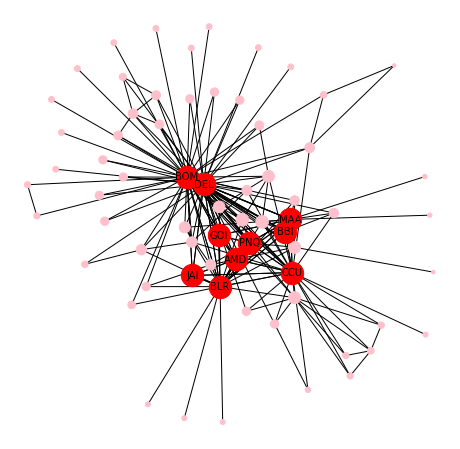

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
pos = nx.spring_layout(sg)
nx.draw(sg, nodelist=eigen.keys(),node_color='pink', node_size=[v * 1000 for v in eigen.values()],pos=pos,ax=ax,with_labels=False)
nx.draw_networkx(sg.subgraph(r['node']), pos=pos, font_size=10,node_size=500, node_color='red', font_color='black',ax=ax,with_labels=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

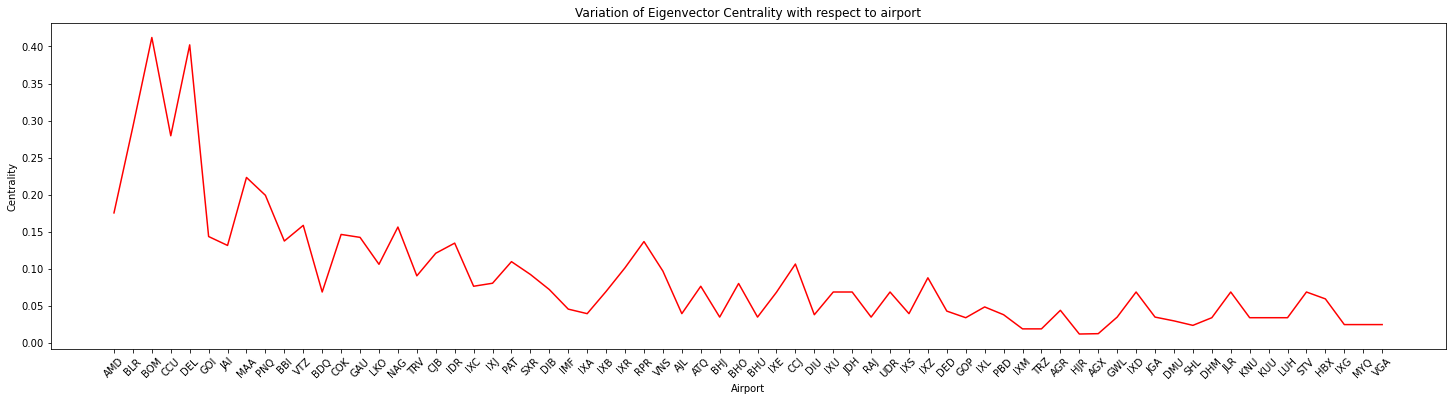

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(25,6))
node_eig = list(eigen.keys())           
centrality_eig = list(eigen.values())        
plt.plot(node_eig,centrality_eig, '-',color='red')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of Eigenvector Centrality with respect to airport")
plt.show

# Comparing all centralities 

<function matplotlib.pyplot.show(*args, **kw)>

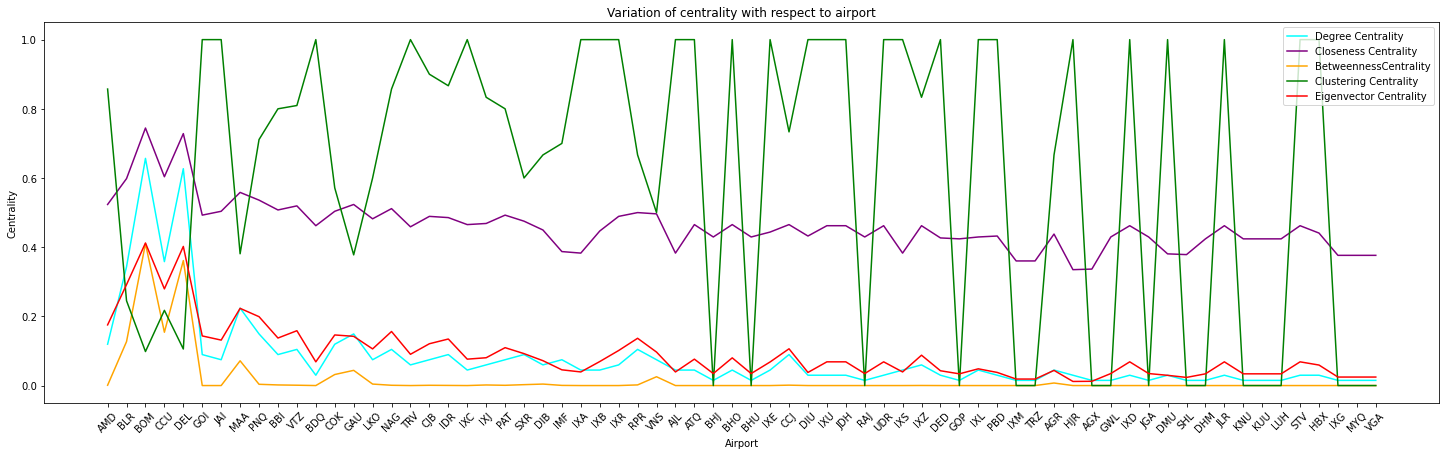

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(25,7))
plt.plot(node_deg, centrality_deg,'-',color='cyan',label='Degree Centrality')
plt.plot(node_close,centrality_close, '-',color='purple',label='Closeness Centrality')
plt.plot(node_bet,centrality_bet, '-',color='orange',label='BetweennessCentrality')
plt.plot(node_clust,centrality_clust, '-',color='green',label='Clustering Centrality')
plt.plot(node_eig,centrality_eig, '-',color='red',label='Eigenvector Centrality')
plt.xlabel("Airport")
plt.ylabel("Centrality")
plt.xticks(rotation=45)
plt.title("Variation of centrality with respect to airport")
plt.legend( loc=1)
plt.show

Here we can see that major Airports like Ahmedabad, Bombay Bangalore and Kolkata CCU Airports show high peaks in all the centralities signifying their importance in the Airport Network of India.

# Conclusion
The analysis of Indian airport network using centrality measures like degree,  betweenness,  closeness,  and clustering coefficients identifies the important airports and its characteristics that help in revamping the economy of the country. The analysis of the In-dian airport networks shows that Ahmedabad, Bangalore and Bombay are  the designated cities in India and which acts as a connection airport for most of the airports within India and help in boosting the trade within and outside of the country. 